In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy

import mylibrary.nnlib as tnn
import mylibrary.dynamicnnlib as tdnn
import mylibrary.datasets as datasets

from mpl_toolkits.mplot3d import Axes3D
import matplotlib

from types import MethodType

## Loading the dataset

In [2]:
mnist = datasets.MNIST()
train_data, train_label_, test_data, test_label_ = mnist.load()

train_data = train_data / 255.
test_data = test_data / 255.

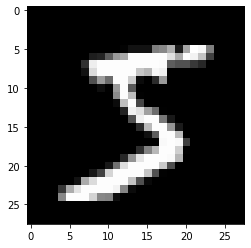

In [3]:
plt.imshow(train_data[0].reshape(28,28), cmap='gray')

In [13]:
input_size = 784
output_size = 10

learning_rate = 0.0001
batch_size = 300
EPOCHS = 10

train_label = tnn.Logits.index_to_logit(train_label_)
train_size = len(train_label)

In [14]:
# 784 ==46 ==35 ==25 ==10 ->
#   \  / \  / \  / \  /
#    20   16    8   13

### Initial Network

In [15]:
optimizer = tnn.Adam(learning_rate)
dynet = tdnn.DynamicNN_Relu([784, 46, 35, 25, 10], [20, 16, 8, 13], optimizer)

In [16]:
total_new_neurons = 0

In [17]:
dynet

784 ==46 ==35 ==25 ==10 ->
  \  / \  / \  / \  /
   20   16    8   13 

In [18]:
train_size // batch_size

200

### Further Training/Adjustment

In [19]:
accuracy_list = []

In [24]:
learning_rate = 0.0001
batch_size = 300
EPOCHS = 10

In [30]:
for epoch in range(EPOCHS):
    
    for index in range(train_size // batch_size):
        
        train_x = train_data[index * batch_size:(index + 1) * batch_size]
        train_y = train_label[index * batch_size:(index + 1) * batch_size]
        
        yout = dynet.forward(train_x)

        dy = tnn.SoftmaxCrossEntropy.del_loss(yout, train_y)
        loss = tnn.SoftmaxCrossEntropy.loss(yout, train_y)

        dx = dynet.backward(dy)

        dynet.update()

        if index % 100 == 0:
            print('\nTRAIN',index, '-> ', loss)

    yout = dynet.forward(train_data)
    outputs = tnn.Logits.logit_to_index(yout)
    correct = (outputs == np.array(train_label_)).sum()

    accuracy = correct / len(train_label_) * 100.
    print('EPOCH = ',epoch,'accuracy = ', accuracy)
    print(correct, '/', len(train_label_))

    yout = dynet.forward(test_data)
    outputs = tnn.Logits.logit_to_index(yout)
    correct = (outputs == np.array(test_label_)).sum()

    accuracy_ = correct / len(test_label_) * 100.
    print('   TEST  ','accuracy = ', accuracy_)
    print(correct, '/', len(test_label_))  
    
    accuracy_list.append((accuracy, accuracy_))


TRAIN 0 ->  7.180997883678639

TRAIN 100 ->  7.176957404433365
EPOCH =  0 accuracy =  99.555
59733 / 60000
   TEST   accuracy =  96.84
9684 / 10000

TRAIN 0 ->  7.180750286371261

TRAIN 100 ->  7.176316249310127
EPOCH =  1 accuracy =  99.55833333333334
59735 / 60000
   TEST   accuracy =  96.82
9682 / 10000

TRAIN 0 ->  7.18038250305292

TRAIN 100 ->  7.176344208231257
EPOCH =  2 accuracy =  99.565
59739 / 60000
   TEST   accuracy =  96.81
9681 / 10000

TRAIN 0 ->  7.179919300966923

TRAIN 100 ->  7.175699059529747
EPOCH =  3 accuracy =  99.58500000000001
59751 / 60000
   TEST   accuracy =  96.77
9677 / 10000

TRAIN 0 ->  7.179708269275322

TRAIN 100 ->  7.175287823013749
EPOCH =  4 accuracy =  99.595
59757 / 60000
   TEST   accuracy =  96.73
9673 / 10000

TRAIN 0 ->  7.179106386332761

TRAIN 100 ->  7.175168073307826
EPOCH =  5 accuracy =  99.61666666666666
59770 / 60000
   TEST   accuracy =  96.75
9675 / 10000

TRAIN 0 ->  7.178950067904061

TRAIN 100 ->  7.1746622765014
EPOCH =  6 a

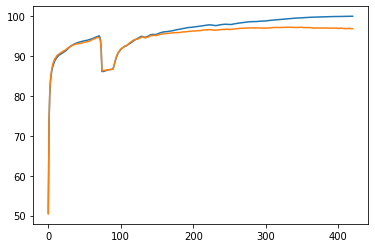

In [343]:
accuracies = np.array(accuracy_list)
plt.plot(accuracies[:,0], label='train')
plt.plot(accuracies[:,1], label='test')

In [344]:
dynet_backup = copy.deepcopy(dynet)
# dynet = copy.deepcopy(dynet_backup)

In [345]:
dynet

784 ==43 ==33 ==24 ==10 ->
  \  / \  / \  / \  /
   20   15    5   15 

## Add Neurons to all possible layers

In [359]:
neurons_added = dynet.add_neurons_to_all_possible_layers()
total_new_neurons += neurons_added
neurons_added

7

In [360]:
dynet

784 ==48 ==38 ==29 ==10 ->
  \  / \  / \  / \  /
   25   20   10   20 

## Remove/Decay Shortcut connection (Residual Layer becomes new Layer)

In [199]:
dynet.start_decaying_removable_shortcut_connections(decay_steps=1980)

In [200]:
dynet.removable_layers

[2]

In [310]:
dynet

784 ==46 ==35 ==25 ==10 ->
  \  / \  / \  / \  /
   20   16    8   13 

## Compute Neuron Significance and decay less significant ones

In [31]:
dynet.compute_neuron_significance(train_data, batch_size)

In [32]:
dynet.significance

[array([[1.59010686, 0.84518143, 0.7815572 , 1.51364593, 0.56692154,
         1.73426696, 1.34777921, 0.60254196, 0.53865982, 0.99683737,
         0.98908701, 1.32206854, 0.52474916, 0.55352705, 0.42355015,
         0.85126633, 0.4959575 , 1.73119043, 1.66113711, 0.57454457,
         0.86649235, 1.44045478, 1.69671659, 1.65124627, 0.7059663 ,
         0.21877082, 1.27204074, 0.73269164, 1.68030587, 0.37960678,
         0.82484117, 1.30543535, 1.69105804, 0.59165071, 0.04550381,
         1.13400987, 0.7863213 , 1.50764892, 0.78361287, 0.17360064,
         1.74263752, 1.20948544, 0.86377333, 0.32084568, 0.40256848,
         0.5638634 ]]),
 array([[0.49964511, 0.57175466, 1.17437726, 0.28536267, 0.78093964,
         1.32114842, 0.88191509, 0.3643933 , 1.85312025, 0.14629385,
         0.77083084, 0.49881668, 0.03398817, 1.18616958, 0.51115404,
         2.20219318, 1.38121162, 0.11007189, 0.48590952, 0.77704441,
         1.07519125, 0.10546596, 1.72185206, 2.39017834, 0.42540814,
         1

In [33]:
dynet.significance_res

[array([[9.00000000e+09, 7.15473936e-02, 1.93130875e+00, 5.36297610e-01,
         9.24596684e-02, 1.59246810e+00, 4.34896928e-01, 1.59124731e-01,
         3.03766582e-01, 3.56009287e-01, 7.03952112e-01, 2.64693249e-01,
         6.43351027e-01, 2.15645601e-01, 8.80288747e-02, 2.09067956e-01,
         4.50815307e-01, 4.66207385e-01, 2.96694395e-01, 5.27159115e-02]]),
 array([[9.00000000e+09, 1.38113350e-01, 3.16188767e-01, 3.59471070e-01,
         2.75345675e-01, 2.39701969e-02, 2.87509457e-01, 2.75939153e-01,
         7.78260602e-01, 4.35618936e-02, 4.52955459e-01, 1.21990112e-01,
         3.50373473e-02, 4.52744757e-02, 1.99683405e-01, 2.89534132e-01]]),
 array([[9.00000000e+09, 7.97511851e-01, 1.64806306e-01, 1.01767018e-01,
         8.08043604e-01, 1.97611941e-01, 4.38259729e-02, 1.08128976e-01]]),
 array([[9.00000000e+09, 4.13825261e-01, 9.85861217e-01, 2.30733270e-01,
         2.01483845e+00, 1.32686209e+00, 1.22312844e+00, 1.64757304e+00,
         7.43126007e-03, 1.85510604e+00, 1

In [349]:
total_new_neurons

0

In [350]:
# num_neurons_remove = total_new_neurons//2
num_neurons_remove = 40
num_neurons_remove

40

In [351]:
dynet.start_decaying_less_significant_neurons(num_neurons_remove, 0.05, steps=1980)

In [352]:
dynet.decay, dynet.decay_res

({}, {})

In [353]:
dynet

784 ==43 ==33 ==24 ==10 ->
  \  / \  / \  / \  /
   20   15    5   15 

In [340]:
total_new_neurons = 0

In [40]:
def print_decay_weights(self):
    for li, neurons in self.decay.items():
        print('Outgoing straight weight')
        print(self.layers[li+1].weights[neurons])
        print('Outgoing residual weight')
        print(self.residuals_0[li+1].weights[neurons])
    for rli, neurons in self.decay_res.items():
        print('Outgoing residual weight -RES')
        print(self.residuals_1[rli].weights[neurons])

In [47]:
print_decay_weights(dynet)

Outgoing straight weight
[[0. 0. 0. 0.]]
Outgoing residual weight
[[0. 0. 0.]]
Outgoing straight weight
[[0.]]
Outgoing residual weight
[[0. 0. 0.]]
Outgoing residual weight -RES
[[0. 0. 0. 0.]]
Outgoing residual weight -RES
[[0.]]


In [42]:
dynet.neuron_decay_rate

{0: array([[-0., -0.,  0.,  0.]]), 1: array([[0.]])}

In [43]:
dynet.neuron_decay_rate2

{0: array([[-1.73693302e-04,  1.30460290e-05,  5.82157570e-04]]),
 1: array([[-2.91732021e-04, -3.32112014e-04, -1.27568576e-05]])}

In [44]:
dynet.neuron_res_decay_rate

{1: array([[-0.00023233, -0.        ,  0.00045947, -0.00011376]]),
 2: array([[0.000156]])}

In [45]:
print_decay_weights(dynet)

Outgoing straight weight
[[-0. -0.  0.  0.]]
Outgoing residual weight
[[-0.17367593  0.01304472  0.58209936]]
Outgoing straight weight
[[0.]]
Outgoing residual weight
[[-0.29170285 -0.33207881 -0.01275558]]
Outgoing residual weight -RES
[[-0.23230191 -0.          0.45942709 -0.11375325]]
Outgoing residual weight -RES
[[0.15598491]]


In [ ]:
'''
STATS

### Dynamic learning architecture  (1)
784 ==46 ==35 ==25 ==10 ->
  \  / \  / \  / \  /
   20   16    8   13 
#####57803 parameters... original LeNet had 60K parameters

TRAIN 100 ->  7.17585516607335
EPOCH =  9 accuracy =  99.66666666666667
59800 / 60000
   TEST   accuracy =  97.11999999999999
9712 / 10000

#########Same model trained from scratch
TRAIN 100 ->  7.173618869475525
EPOCH =  9 accuracy =  99.645
59787 / 60000
   TEST   accuracy =  96.81
9681 / 10000


### Dynamic learning architecture  (2)
784 ==43 ==33 ==24 ==10 ->
  \  / \  / \  / \  /
   20   15    5   15
   
TRAIN 100 ->  7.16729636305383
EPOCH =  9 accuracy =  99.945
59967 / 60000
   TEST   accuracy =  96.84
9684 / 10000

'''

In [299]:
# dynet_backup_1 = copy.deepcopy(dynet)
# dynet = copy.deepcopy(dynet_backup)

In [354]:
# dynet_backup_2 = copy.deepcopy(dynet)
# dynet = copy.deepcopy(dynet_backup)